In [ ]:
## 분석 순서

1. 데이터 수집(다운로드)
-github
-wget
-kaggle
-.csv

2. 데이터 살펴보기(EDA)
-결측치
-이상치(시각화)
-통계량

3. 데이터 전처리(모델링 적용하기)
-스케일 조정 (데이터들의 단위가 제각각일 때 그것을 하나로 통일하는 역할)
   -min-max
   -standard

4. 모델링
-train_test_split
-fit, fit_transform

5. 평가(예측)
6. 정리(시각화, 성능 비교)

In [ ]:
## 복습

In [ ]:
#수학적 계산을 위한 넘파이 패키지
import numpy as np

#데이터프레임(행열 형태의 데이터)를 다루기 위한 판다스 패키지
import pandas as pd

#머신러닝 패키지 - 사이킷런
import sklearn

In [ ]:
#경로로 데이터 불러오기
data_path = '/content/drive/MyDrive/iris.csv'

In [ ]:
#판다스의 read_csv 함수
#csv(,로 나누어져 있는 파일)을 읽어온다
raw = pd.read_csv(data_path)

In [ ]:
raw.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [ ]:
#수학적 통계량 (수학적 요소들을 한 눈에 확인 가능)
raw.describe()


,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#일반 정보
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#중복 없는 요소 알려주는
raw['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [ ]:
#인코딩
raw['variety'].replace({'Setosa':0, 'Versicolor':1, 'Virginica':2}, inplace = True)

In [ ]:
raw.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#데이터셋 준비(X, y)
#train-test split 진행

In [ ]:
raw.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
X= raw[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
Y = raw[['variety']]

In [ ]:
X

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
Y

,variety
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
print(X_train)

     sepal.length  sepal.width  petal.length  petal.width
66            5.6          3.0           4.5          1.5
24            4.8          3.4           1.9          0.2
131           7.9          3.8           6.4          2.0
147           6.5          3.0           5.2          2.0
112           6.8          3.0           5.5          2.1
..            ...          ...           ...          ...
63            6.1          2.9           4.7          1.4
65            6.7          3.1           4.4          1.4
144           6.7          3.3           5.7          2.5
1             4.9          3.0           1.4          0.2
55            5.7          2.8           4.5          1.3

[105 rows x 4 columns]


In [ ]:
print(len(X_test))

45


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = dt.predict(X_test)

In [ ]:
y_predict

array([0, 2, 0, 1, 0, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 0, 1, 1, 2, 1, 1, 0,
       0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1,
       2])

In [ ]:
#평가(매트릭)
#정확도(accuracy)

from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, y_predict)

In [ ]:
print(acc)

0.9555555555555556


In [ ]:
#여기까지가 머신러닝 지도학습

In [ ]:
#2. 지도학습 - 선형회귀

In [ ]:
import numpy as np
import pandas as pd

#시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

#경고창 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/machine.data'

In [ ]:
df = pd.read_csv(path, header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [ ]:
#헤더(이름)가 바뀜
df.columns = ['Vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP']

In [ ]:
df

,Vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...,...,...
204,sperry,80/8,124,1000,8000,0,1,8,42,37
205,sperry,90/80-model-3,98,1000,8000,32,2,8,46,50
206,sratus,32,125,2000,8000,0,2,14,52,41
207,wang,vs-100,480,512,8000,32,0,0,67,47


In [ ]:
#데이터 프레임의 행, 열 길이
print(df.shape)

#데이터 프레임의 통계량
print(df.describe())

#데이터 프레임의 일반 정보
print(df.info())

(209, 10)
              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.622010    99.330144  
std     25.997318   160.830733   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  
7

In [ ]:
#이상치 의심
print(df.describe())

              MYCT          MMIN          MMAX        CACH       CHMIN  \
count   209.000000    209.000000    209.000000  209.000000  209.000000   
mean    203.822967   2867.980861  11796.153110   25.205742    4.698565   
std     260.262926   3878.742758  11726.564377   40.628722    6.816274   
min      17.000000     64.000000     64.000000    0.000000    0.000000   
25%      50.000000    768.000000   4000.000000    0.000000    1.000000   
50%     110.000000   2000.000000   8000.000000    8.000000    2.000000   
75%     225.000000   4000.000000  16000.000000   32.000000    6.000000   
max    1500.000000  32000.000000  64000.000000  256.000000   52.000000   

            CHMAX          PRP          ERP  
count  209.000000   209.000000   209.000000  
mean    18.267943   105.622010    99.330144  
std     25.997318   160.830733   154.757102  
min      0.000000     6.000000    15.000000  
25%      5.000000    27.000000    28.000000  
50%      8.000000    50.000000    45.000000  
75%     24.

In [ ]:
#object들 인코딩해줘야 함

In [ ]:
#컴프리헨션(문법, 깔끔)
#리스트 컴프리헨션 (for 부터 읽고 맨 오른쪽부터 왼쪽 순서로)
#데이터 타입이 object 라면 리스트에 col을 넣는다
#인코딩할 열을 따로 분리하기 위해

categorical = [col for col in df.columns if df[col].dtype == 'object']

In [ ]:
categorical

['Vendor name', 'Model Name']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Vendor name  209 non-null    object
 1   Model Name   209 non-null    object
 2   MYCT         209 non-null    int64 
 3   MMIN         209 non-null    int64 
 4   MMAX         209 non-null    int64 
 5   CACH         209 non-null    int64 
 6   CHMIN        209 non-null    int64 
 7   CHMAX        209 non-null    int64 
 8   PRP          209 non-null    int64 
 9   ERP          209 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [ ]:
#이 열의 데이터중 중복 없이 종류를 인쇄
df[categorical[0]].unique()

array(['adviser', 'amdahl', 'apollo', 'basf', 'bti', 'burroughs', 'c.r.d',
       'cdc', 'cambex', 'dec', 'dg', 'formation', 'four-phase', 'gould',
       'hp', 'harris', 'honeywell', 'ibm', 'ipl', 'magnuson', 'microdata',
       'nas', 'ncr', 'nixdorf', 'perkin-elmer', 'prime', 'siemens',
       'sperry', 'sratus', 'wang'], dtype=object)

In [ ]:
#각각의 데이터가 몇 개씩 존재하는지 확인
df[categorical[0]].value_counts()

Vendor name
ibm             32
nas             19
ncr             13
sperry          13
honeywell       13
siemens         12
cdc              9
amdahl           9
burroughs        8
hp               7
harris           7
dg               7
dec              6
c.r.d            6
ipl              6
magnuson         6
cambex           5
prime            5
formation        5
perkin-elmer     3
gould            3
nixdorf          3
wang             2
bti              2
basf             2
apollo           2
microdata        1
four-phase       1
sratus           1
adviser          1
Name: count, dtype: int64

In [ ]:
print(len(df[categorical[1]].unique()))

#인코딩(정보가 y값에 영향을 미칠까봐 하는 것) 의미 X (why? 이름이 다 다름)
#->정수 인코딩

209


In [ ]:
### 시각화

In [ ]:
df.columns

Index(['Vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN',
       'CHMAX', 'PRP', 'ERP'],
      dtype='object')

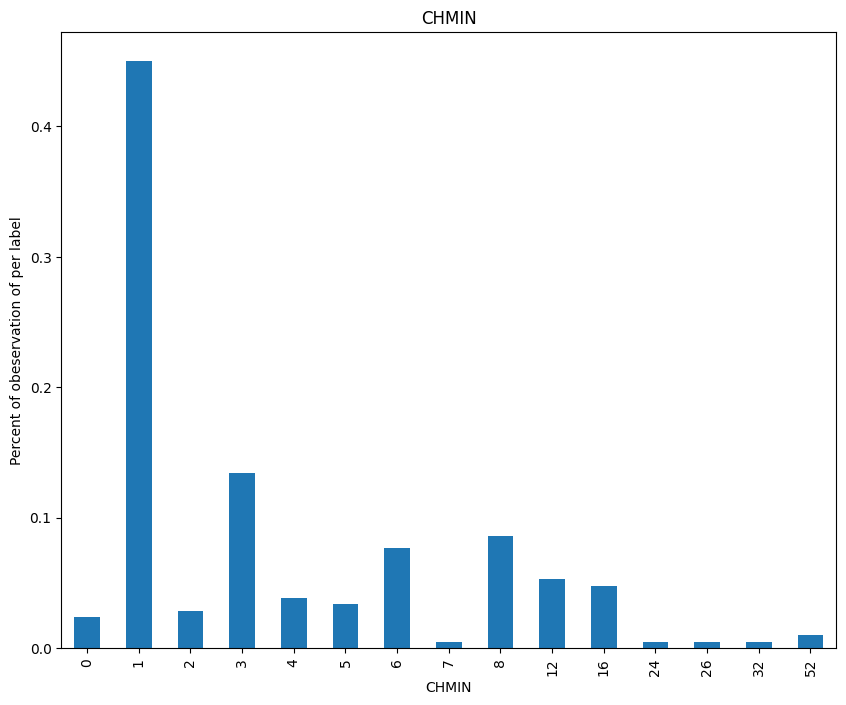

In [ ]:
#1. 도화지 준비 (도화지 제목 붙이고 y 제목 붙이고 벽에 전시)
plt.figure(figsize=(10, 8))

##groupby 사용 중요 - 데이터 시각화하는 줄 (전체 비중 분의 카운트를 바 모양으로 그려줘)
(df.groupby('CHMIN')['CHMIN'].count()/len(df)).plot.bar()

plt.ylabel("Percent of obeservation of per label")
plt.title("CHMIN")
plt.show()

In [ ]:
#->1이 거의 절반을 차지하는 비율. 7,24,26,32는 희귀. 52는 이상치

In [ ]:
#categorical로 된 열을 버림 (인코딩이 안 될 것 같으니 슬라이싱)

#[시작:끝:간격]
#[3:] : 세 번째부터 끝까지
#[2:5] : 두 번째, 세 번째, 네 번째
#[2:5:2] : 두 번째, 네 번째 (간격이 2니까)
#[-3] : 뒤에서부터 세 번째 (맨 뒤는 -1. 맨 앞은 0이지만 맨 뒤는 0이 아님)

#전체 행을 다 사용하겠음 " : "
#2번 열부터 사용하겠음 " 2: "
#df.iloc[행, 열]
X = df.iloc[: , 2:-1]
#-1은 뒤에서 첫 번째까지를 의미

In [ ]:
Y = df.iloc[:, -1]

In [ ]:
X

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,125,256,6000,256,16,128,198,199
1,29,8000,32000,32,8,32,269,253
2,29,8000,32000,32,8,32,220,253
3,29,8000,32000,32,8,32,172,253
4,29,8000,16000,32,8,16,132,132
...,...,...,...,...,...,...,...,...
204,124,1000,8000,0,1,8,42,37
205,98,1000,8000,32,2,8,46,50
206,125,2000,8000,0,2,14,52,41
207,480,512,8000,32,0,0,67,47


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
#스케일 변환
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[ 0.55259193, -0.59701694, -0.8756231 , ..., -0.60795332,
        -0.25938068, -0.52845182],
       [ 0.55259193, -0.65934162, -0.79226827, ..., -0.60795332,
        -0.51116512, -0.52229919],
       [ 0.26365867, -0.47821052,  0.29134455, ..., -0.39293107,
        -0.37328317, -0.26388878],
       ...,
       [-0.61139636,  0.25215682, -0.37549411, ...,  0.63917573,
         0.0223781 , -0.16544672],
       [-0.17799646,  0.03304662, -0.52553281, ...,  0.12312233,
        -0.47519592, -0.4177045 ],
       [-0.66505539, -0.40273923, -0.82394311, ...,  0.29514013,
         1.53308476, -0.03008888]])

In [ ]:
#모델링
#선형회귀 : 이 데이터를 가장 잘 설명하는 한 개 혹은 여러 개의 선, 방정식을 찾는 것

In [ ]:
from sklearn.linear_model import LinearRegression

Ir = LinearRegression()
Ir.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_predict = Ir.predict(X_test)

In [ ]:
print(f"기울기 : {Ir.coef_}")
print(f"절편 : {Ir.intercept_}")

기울기 : [ 4.60978456e-15 -5.68434189e-14 -1.70530257e-13 -5.32907052e-15
 -1.24344979e-14 -5.68434189e-14 -3.19744231e-14  1.62532152e+02]
절편 : 106.89041095890411


In [ ]:
from sklearn.metrics import r2_score

#R2 : 회귀선이 데이터의 분포를 얼마나 잘 나타내고 있는가를 계산하는 함수
#이 점수가 0.7보다 높다 : 분포를 잘 표현하고 있다
#결정계수 (이 선에 의해서 전체 포인트 중 몇 퍼센트나 설명될 수 있는가)

print(f"R2 Score : {r2_score(Y_test, y_predict)}")

R2 Score : 0.9101955321377432


In [ ]:
#지도학습 - 의사결정나무

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [ ]:
#데이터를 인터넷 주소로 다운로드

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

In [ ]:
#1. 데이터의 형태(shape)
df.shape

(891, 12)

In [ ]:
#2. 데이터의 통계량
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#3. 데이터의 정보

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#결측치 전처리

#평균값으로 대체
d_mean = df['Age'].mean()

In [ ]:
d_mean

29.69911764705882

In [ ]:
df['Age'].fillna(d_mean, inplace=True)

In [ ]:
#최빈값으로 대체

d_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(d_mode, inplace=True)

In [ ]:
#결측치가 너무 많으면 버려도 됨.
#제거
#inplace=True = 원본값을 대체

df.drop(columns='Cabin', inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['en_sex'] = le.fit_transform(df['Sex'])
df['en_embarked'] = le.fit_transform(df['Embarked'])

In [ ]:
#붙이기 , axis=0 이면 행으로 위아래로 붙이기 1이면 양옆으로

df = pd.concat([df, df['en_sex'], df['en_embarked']], axis=1)

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,en_sex,en_Embarked,en_embarked,en_sex,en_embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1,2,2,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,2,2,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0,2,2,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1,2,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,1,2,2,1,2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,0,2,2,0,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,0,2,2,0,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,1,0,0,1,0


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'en_sex', 'en_Embarked',
       'en_embarked', 'en_sex', 'en_embarked'],
      dtype='object')

In [ ]:
#X : 생존에 영향을 미쳤을 것 같은 요소
#Y : 생존했는지 여부

X = df[['Pclass', 'en_sex', 'en_Embarked', 'Age']]
Y = df['Survived']

In [ ]:
#분석 데이터 분할

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, y_predict)
print(acc)

0.776536312849162


In [ ]:
### 분류를 다양한 모델로 적용해보기

In [ ]:
#의사결정나무는 나무 한 그루. 어떤 결정을 할 때 에이 요소, 비라는 요소를 고려.. 한 번만 시도
#포레스트는 숲이니까 나무 여러 그루로 해 보는 것. 에이로 했다가 비로 했다가 다양하게 방법을 바꿔가면서
#수용하되 다수결의 원칙으로. 앙상블 : 여러 개의 방법을 수행하고 그것을 섞어서 결론을 낸다

In [ ]:
#세 모델 중 하나를 골라서 학습/예측 수행해보

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#서포트 백터 머신을 활용한 모델링 (정의와 훈련)
#어떤 것을 기준으로 결정할 것인지 : (kernel='rbf')

svc = svm.SVC(kernel='rbf')
svc.fit(X_train, Y_train)

SVC()

In [ ]:
predict = svc.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Y_test, predict)
print(acc)

0.5810055865921788


In [ ]:
#렌덤포레스트로 모델링.
#몇 그루의 나무인지 : 20개 , 몇 번 분기가 있을 건지 : 3번

rf = RandomForestClassifier(n_estimators=20, max_depth=3)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_depth=3, n_estimators=20)

In [ ]:
predict = rf.predict(X_test)

In [ ]:
acc = accuracy_score(Y_test, predict)
print(acc)

0.7877094972067039


In [ ]:
#knn으로 모델링
#이웃을 얼마나 설정할지 : 5

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
predict = knn.predict(X_test)

In [ ]:
acc = accuracy_score(Y_test, predict)
print(acc)

0.7597765363128491


In [ ]:
##실습

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/kidney_disease.csv'

In [ ]:
df = pd.read_csv(path)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/kedney_disease.csv'

In [ ]:
df.head()

,adviser,32/60,125,256,6000,256.1,16,128,198,199
0,amdahl,470v/7,29,8000,32000,32,8,32,269,253
1,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
2,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
3,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
4,amdahl,470v/b,26,8000,32000,64,8,32,318,290


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   adviser  208 non-null    object
 1   32/60    208 non-null    object
 2   125      208 non-null    int64 
 3   256      208 non-null    int64 
 4   6000     208 non-null    int64 
 5   256.1    208 non-null    int64 
 6   16       208 non-null    int64 
 7   128      208 non-null    int64 
 8   198      208 non-null    int64 
 9   199      208 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


In [ ]:
df.shape

(208, 10)

In [ ]:
df.describe()

,125,256,6000,256.1,16,128,198,199
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,204.201923,2880.538462,11824.019231,24.096154,4.644231,17.740385,105.177885,98.850962
std,260.833016,3883.839300,11747.916663,37.417999,6.787198,24.913375,161.090223,154.974961
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,49.500000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,111.500000,99.500000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [ ]:
df.drop(columns='adviser', inplace=True)

In [ ]:
df.drop(columns='32/60', inplace=True)

In [ ]:
df.head()

,125,256,6000,256.1,16,128,198,199
0,29,8000,32000,32,8,32,269,253
1,29,8000,32000,32,8,32,220,253
2,29,8000,32000,32,8,32,172,253
3,29,8000,16000,32,8,16,132,132
4,26,8000,32000,64,8,32,318,290


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_predict = dt.predict(X_test)

In [ ]:
acc = accuracy_score(Y_test, y_predict)
print(acc)

0.7597765363128491


In [ ]:
df.columns

Index(['125', '256', '6000', '256.1', '16', '128', '198', '199'], dtype='object')

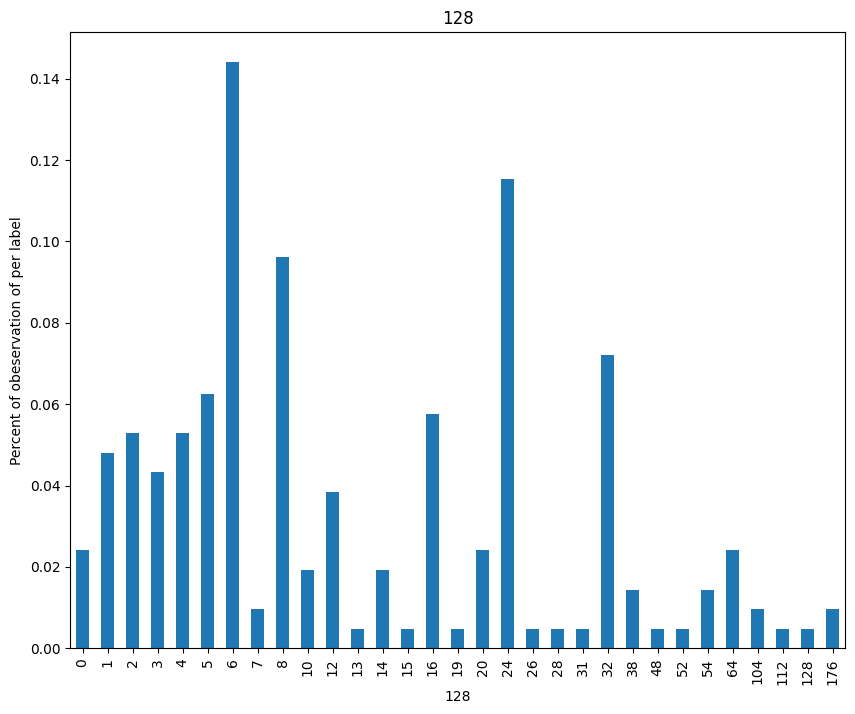

In [ ]:
plt.figure(figsize=(10, 8))
(df.groupby('128')['128'].count()/len(df)).plot.bar()

plt.ylabel("Percent of obeservation of per label")
plt.title("128")
plt.show()